In [1]:
from scipy.stats import lognorm, kstest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')


In [4]:
df = pd.read_csv("tiempos(1).csv")
df.head(4)

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min]
0,97.5,35.76,2.71,0,1,10.60
1,97.5,35.76,2.71,0,2,32.08
2,97.5,35.76,2.71,0,3,6.95
3,97.5,35.76,2.71,0,5,27.64


In [5]:
# Creación de un ID para identificar cada registro:

df['Combinación'] = df.iloc[:,:3].astype('str').apply('-'.join , axis=1)
obs = []
valor = []
for enum, val in enumerate(df['Combinación'].unique(), start=1):
    obs.append(enum)
    valor.append(val)
tabla_obs_val = pd.DataFrame({'obs':obs, 'Combinación':valor})
df = df.merge(tabla_obs_val, on='Combinación', how='left') 

In [6]:
df['orig_i_dest_j'] = list(zip('i_'+df['i'].astype('str'), 'j_'+df['j'].astype('str')))

In [7]:
df

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min],Combinación,obs,orig_i_dest_j
0,97.5,35.76,2.71,0,1,10.60,97.5-35.76-2.71,1,"(i_0, j_1)"
1,97.5,35.76,2.71,0,2,32.08,97.5-35.76-2.71,1,"(i_0, j_2)"
2,97.5,35.76,2.71,0,3,6.95,97.5-35.76-2.71,1,"(i_0, j_3)"
3,97.5,35.76,2.71,0,5,27.64,97.5-35.76-2.71,1,"(i_0, j_5)"
4,97.5,35.76,2.71,0,7,24.13,97.5-35.76-2.71,1,"(i_0, j_7)"
...,...,...,...,...,...,...,...,...,...
30995,96.5,53.68,3.59,5,6,29.32,96.5-53.68-3.59,1000,"(i_5, j_6)"
30996,96.5,53.68,3.59,5,9,30.99,96.5-53.68-3.59,1000,"(i_5, j_9)"
30997,96.5,53.68,3.59,7,8,26.00,96.5-53.68-3.59,1000,"(i_7, j_8)"
30998,96.5,53.68,3.59,7,10,13.91,96.5-53.68-3.59,1000,"(i_7, j_10)"


Text(0.5, 1.0, 'Distribución duración viaje por trayecto')

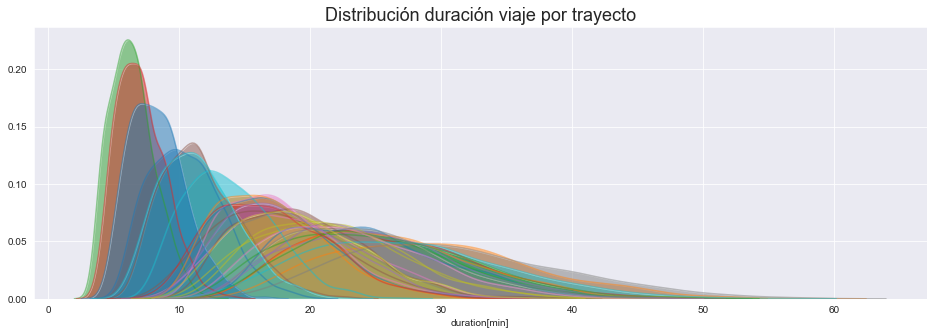

In [8]:
plt.figure(figsize=(16,5))
for i in df['orig_i_dest_j'].unique():
    sns.distplot(df[df['orig_i_dest_j']==i]['duration[min]'], hist=False, kde_kws={'shade':True,'alpha':0.5})
plt.title('Distribución duración viaje por trayecto', fontsize=18)

In [11]:
df.groupby(by='orig_i_dest_j').agg({'duration[min]':'mean'})['duration[min]'].describe()

count    31.000000
mean     19.517864
std       6.493940
min       6.459820
25%      17.044055
50%      19.272160
75%      24.389980
max      31.020640
Name: duration[min], dtype: float64

Text(0.5, 1.0, 'Distribución tiempo duración (min)')

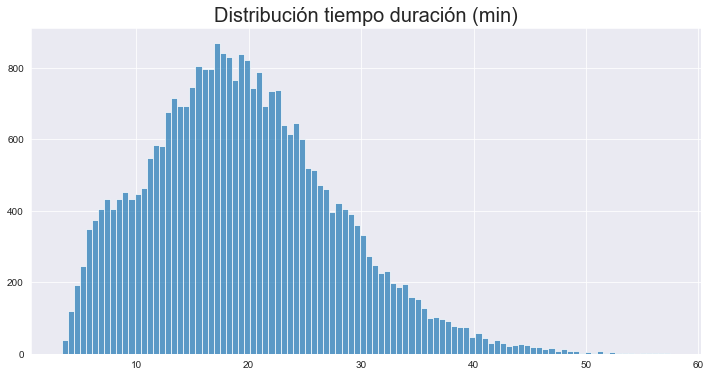

In [12]:
df['duration[min]'].hist(figsize=(12,6), bins=100, alpha=0.7)
plt.title('Distribución tiempo duración (min)', fontsize=20)

Text(0.5, 1.0, 'Boxplot duración')

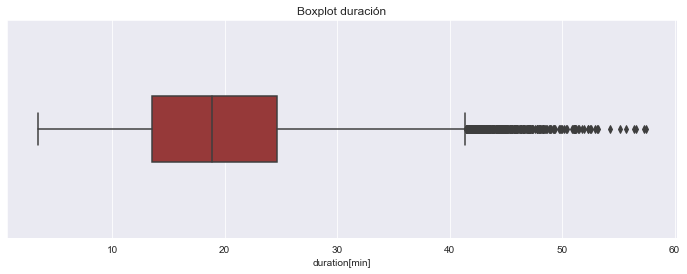

In [52]:
plt.figure(figsize=(12,4))
sns.boxplot(df['duration[min]'], width=0.3, color='brown')
plt.title('Boxplot duración')

In [16]:
eli = np.arange(1,100)